<a href="https://colab.research.google.com/github/software-dev2010/BlackBoxMachineLearning/blob/main/ProiectBlackBox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [503]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Import TensorFlow
import tensorflow as tf
print("TF version: ", tf.__version__)

# import TensorFlow Hub 
import tensorflow_hub as hub
print("HUB version: ", hub.__version__)

#!unzip "drive/MyDrive/Facultate/ia-id-22" -d "drive/My Drive/Facultate"

TF version:  2.8.0
HUB version:  0.12.0


In [504]:
train_samples = np.load("drive/MyDrive/Facultate/train_samples.npy")
np.set_printoptions(suppress=True)

In [505]:
train_samples = train_samples.T
x_train = np.reshape(train_samples, (1000, 28, 28))

In [506]:
train_samples.shape

(1000, 784)

In [507]:
#x_train = train_samples

In [508]:
x_train

array([[[0.12039034, 0.        , 0.        , ..., 0.        ,
         0.25186906, 0.        ],
        [0.00002647, 0.        , 0.00023887, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.6889491 , 0.        ],
        ...,
        [0.00018945, 0.92377214, 0.        , ..., 0.        ,
         0.        , 0.18755319],
        [0.        , 0.00000971, 0.00064975, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.13388185, ..., 0.39041834,
         0.19844221, 0.07407835]],

       [[0.32371807, 0.        , 0.17420925, ..., 0.        ,
         0.72341737, 0.64603305],
        [0.00033012, 0.        , 0.65124033, ..., 0.        ,
         0.44704811, 0.        ],
        [0.        , 0.        , 0.00000003, ..., 0.        ,
         0.00000014, 0.        ],
        ...,
        [0.        , 0.00170334, 0.        , ..., 0.        ,
         0.        , 0.69331541],
        [0.0

In [509]:
type(x_train)

numpy.ndarray

In [510]:
#x_train = x_train.astype('uint8')

In [511]:
x_train.dtype

dtype('float64')

In [512]:
x_train.size

784000

In [513]:
x_train.shape

(1000, 28, 28)

In [514]:
x_train[0]

array([[0.12039034, 0.        , 0.        , 0.67684946, 0.762416  ,
        0.86248539, 0.        , 0.        , 0.        , 0.00000214,
        0.        , 0.        , 0.        , 0.00030336, 0.00005833,
        0.        , 0.        , 0.        , 0.00001704, 0.        ,
        0.02893439, 0.43329571, 0.        , 0.97344309, 0.00065164,
        0.        , 0.25186906, 0.        ],
       [0.00002647, 0.        , 0.00023887, 0.05107286, 0.1197222 ,
        0.26131522, 0.        , 0.05044949, 0.02961606, 0.00005426,
        0.        , 0.00178306, 0.        , 0.        , 0.        ,
        0.        , 0.18713329, 0.        , 0.13431652, 0.00001007,
        0.00016623, 0.        , 0.00007904, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00000011,
        0.0052616 , 0.20294112, 0.        , 0.14663555, 0.12491417,
        0.        , 0.        , 0.        , 0.46085609, 0.        ,
        0.00023056, 0.9525

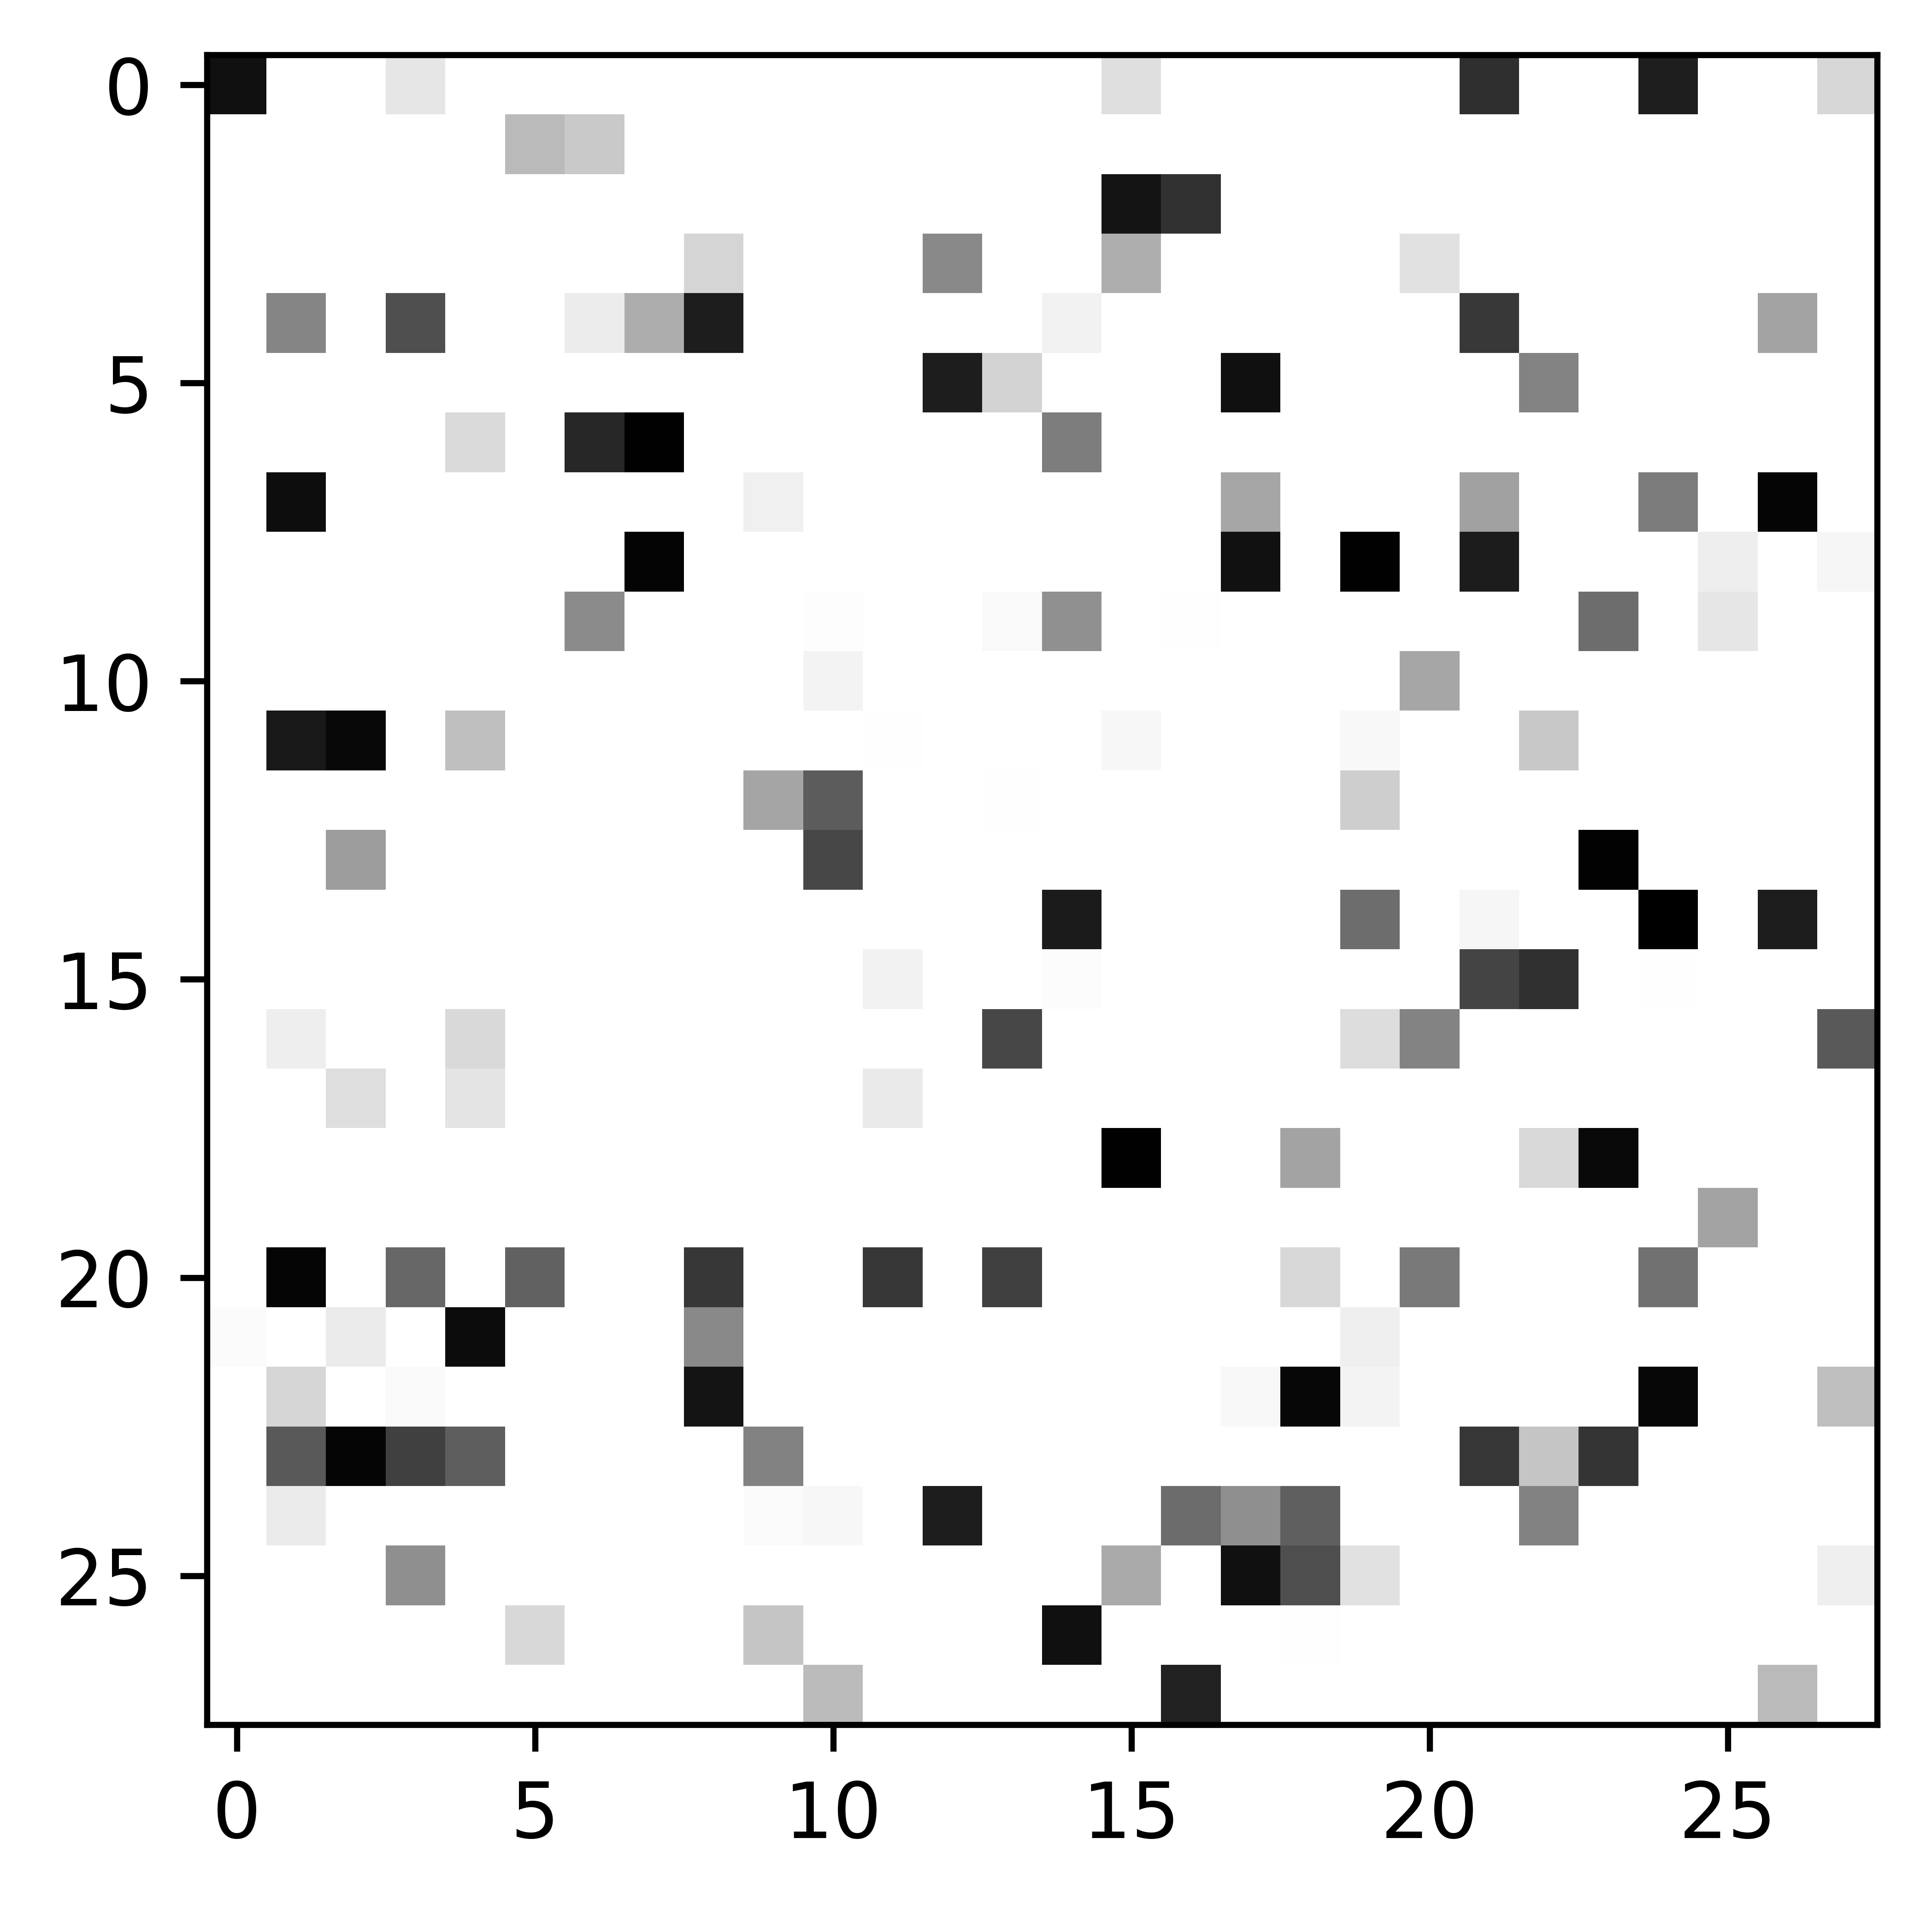

In [515]:
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
plt.imshow(x_train[6],cmap=plt.cm.binary)
plt.show()

In [516]:

x_train.size

784000

In [517]:

x_train.dtype

dtype('float64')

In [518]:
test_samples = np.load("drive/MyDrive/Facultate/test_samples.npy")
np.set_printoptions(suppress=True)

In [519]:
test_samples

array([[0.00002352, 0.81171077, 0.99141869, ..., 0.96318398, 0.91632066,
        0.03107871],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50581123, 0.        , 0.00006633, ..., 0.0000471 , 0.53911149,
        0.        ],
       ...,
       [0.22671873, 0.        , 0.        , ..., 0.        , 0.4831048 ,
        0.        ],
       [0.09692939, 0.1140587 , 0.66867977, ..., 0.29670893, 0.24744506,
        0.44129307],
       [0.84257603, 0.00005355, 0.05365002, ..., 0.00630429, 0.        ,
        0.49411784]])

In [520]:
train_labels = np.load("drive/MyDrive/Facultate/train_labels.npy")
np.set_printoptions(suppress=True)

In [521]:
train_labels

array([ 8,  4,  5,  7,  2,  9,  2,  1, 10,  9,  1,  4,  2,  3,  8,  1,  3,
       10,  7,  1,  2,  7,  8,  2, 10,  8,  7,  6,  6,  9,  9,  4,  5,  5,
        9,  8,  4,  7,  5,  7,  7,  4,  9,  9, 10, 10,  5,  5,  1,  8,  9,
        2,  1,  1,  2,  9,  6,  8,  2,  8,  6,  6, 10, 10,  5,  3,  6,  4,
        8,  5,  7,  7,  1,  2,  1,  2,  3,  5,  9,  6,  4,  6,  1,  1,  7,
        5,  4,  9,  4,  8,  2,  5,  4, 10,  3,  3,  1,  4,  7,  7,  8,  5,
        4,  3,  3,  5, 10,  2,  1,  6,  3,  5,  9,  3,  2,  1,  9,  5,  5,
        9,  1,  7,  5,  2,  5, 10,  7,  4,  2,  3, 10,  1,  2,  1,  5,  3,
       10, 10,  5,  4,  9,  7, 10,  4,  1,  7,  8,  1,  4,  2,  5,  3,  4,
        4,  1,  5,  3,  6,  6,  7,  4,  8,  3,  9,  6, 10,  3,  1,  2,  2,
        9,  3, 10,  4,  2,  5,  2,  6,  8,  7,  5,  8,  8,  9,  4, 10,  4,
        1,  6,  2,  4,  3,  1,  4,  1,  5,  1,  8,  5,  9,  9, 10,  1,  1,
        2,  9,  8,  4, 10, 10,  6,  6, 10,  7,  8,  9,  3,  5,  7, 10,  9,
        2,  7,  8, 10,  2

In [522]:

train_labels.shape


(1000,)

In [523]:
y_train = train_labels

In [524]:
y_train[0]

8

In [525]:
test_samples.shape

(784, 5000)

In [526]:
test_samples = test_samples.T
x_test = np.reshape(test_samples, (5000, 28, 28))
#x_test = test_samples

In [527]:
x_test

array([[[0.00002352, 0.        , 0.50581123, ..., 0.        ,
         0.        , 0.06640521],
        [0.00000002, 0.        , 0.79021775, ..., 0.        ,
         0.00000003, 0.58130774],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.02320033, 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.98351532],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.88396268, 0.        ],
        [0.        , 0.        , 0.64499773, ..., 0.22671873,
         0.09692939, 0.84257603]],

       [[0.81171077, 0.        , 0.        , ..., 0.        ,
         0.        , 0.04757896],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.08582774],
        [0. 

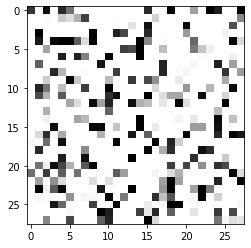

In [528]:
import matplotlib.pyplot as plt

plt.imshow(x_test[500
                ],cmap=plt.cm.binary)
plt.show()

In [529]:
x_train.shape
y_train.shape

(1000,)

In [530]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

In [531]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [532]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


Train labels:  {1: 113, 2: 108, 3: 93, 4: 115, 5: 88, 6: 80, 7: 107, 8: 101, 9: 89, 10: 106}


In [533]:
y_train

array([ 8,  4,  5,  7,  2,  9,  2,  1, 10,  9,  1,  4,  2,  3,  8,  1,  3,
       10,  7,  1,  2,  7,  8,  2, 10,  8,  7,  6,  6,  9,  9,  4,  5,  5,
        9,  8,  4,  7,  5,  7,  7,  4,  9,  9, 10, 10,  5,  5,  1,  8,  9,
        2,  1,  1,  2,  9,  6,  8,  2,  8,  6,  6, 10, 10,  5,  3,  6,  4,
        8,  5,  7,  7,  1,  2,  1,  2,  3,  5,  9,  6,  4,  6,  1,  1,  7,
        5,  4,  9,  4,  8,  2,  5,  4, 10,  3,  3,  1,  4,  7,  7,  8,  5,
        4,  3,  3,  5, 10,  2,  1,  6,  3,  5,  9,  3,  2,  1,  9,  5,  5,
        9,  1,  7,  5,  2,  5, 10,  7,  4,  2,  3, 10,  1,  2,  1,  5,  3,
       10, 10,  5,  4,  9,  7, 10,  4,  1,  7,  8,  1,  4,  2,  5,  3,  4,
        4,  1,  5,  3,  6,  6,  7,  4,  8,  3,  9,  6, 10,  3,  1,  2,  2,
        9,  3, 10,  4,  2,  5,  2,  6,  8,  7,  5,  8,  8,  9,  4, 10,  4,
        1,  6,  2,  4,  3,  1,  4,  1,  5,  1,  8,  5,  9,  9, 10,  1,  1,
        2,  9,  8,  4, 10, 10,  6,  6, 10,  7,  8,  9,  3,  5,  7, 10,  9,
        2,  7,  8, 10,  2

In [534]:
# convert to one-hot vector
#y_train = to_categorical(y_trainiyyyytifti)

In [535]:
# Find the unique label values
unique_labels = np.unique(y_train)
len(unique_labels)

10

In [568]:
unique_labels

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [536]:
boolean_labels = [label  == unique_labels for label in y_train]
boolean_labels[:2]

[array([False, False, False, False, False, False, False,  True, False,
        False]),
 array([False, False, False,  True, False, False, False, False, False,
        False])]

In [537]:
len(boolean_labels)

1000

In [570]:
# Example: Turning a boolean array into integers
print(y_train[0]) # original label

print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7
[0 0 0 0 0 0 0 1 0 0]


In [ ]:
boolean_labels

In [572]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [539]:
y_train = [bool_label.astype(float) for bool_label in boolean_labels]


In [540]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [541]:
y_train = np.array(y_train)

In [542]:

y_train.shape

(1000, 10)

In [543]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [544]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [545]:
x_train.shape

(1000, 784)

In [546]:
x_train

array([[0.00047212, 0.        , 0.        , ..., 0.00153105, 0.0007782 ,
        0.0002905 ],
       [0.00126948, 0.        , 0.00068317, ..., 0.00011132, 0.00249726,
        0.00315148],
       [0.00000013, 0.        , 0.00170771, ..., 0.00187932, 0.00000214,
        0.00064267],
       ...,
       [0.00367106, 0.        , 0.00342476, ..., 0.00135837, 0.00381804,
        0.0023643 ],
       [0.00137899, 0.        , 0.00214789, ..., 0.00000006, 0.00000206,
        0.00000119],
       [0.00049759, 0.        , 0.00209661, ..., 0.0036054 , 0.00031686,
        0.00305036]], dtype=float32)

In [547]:
x_test[0]

array([0.00000009, 0.        , 0.00198357, 0.00215605, 0.        ,
       0.00291472, 0.        , 0.        , 0.        , 0.00028963,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00043649, 0.        , 0.        , 0.00281148, 0.        ,
       0.00001771, 0.00000021, 0.        , 0.00000126, 0.00008577,
       0.        , 0.        , 0.00026041, 0.        , 0.        ,
       0.00309889, 0.00165007, 0.00193033, 0.00001212, 0.00000008,
       0.00157336, 0.        , 0.00021984, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00003564,
       0.        , 0.        , 0.        , 0.00011307, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00227964, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00000318, 0.        , 0.        , 0.        , 0.00037814,
       0.        , 0.00028306, 0.00273654, 0.        , 0.00383

In [548]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [549]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [550]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 256)               200960    
                                                                 
 activation_18 (Activation)  (None, 256)               0         
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 activation_19 (Activation)  (None, 256)               0         
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 10)               

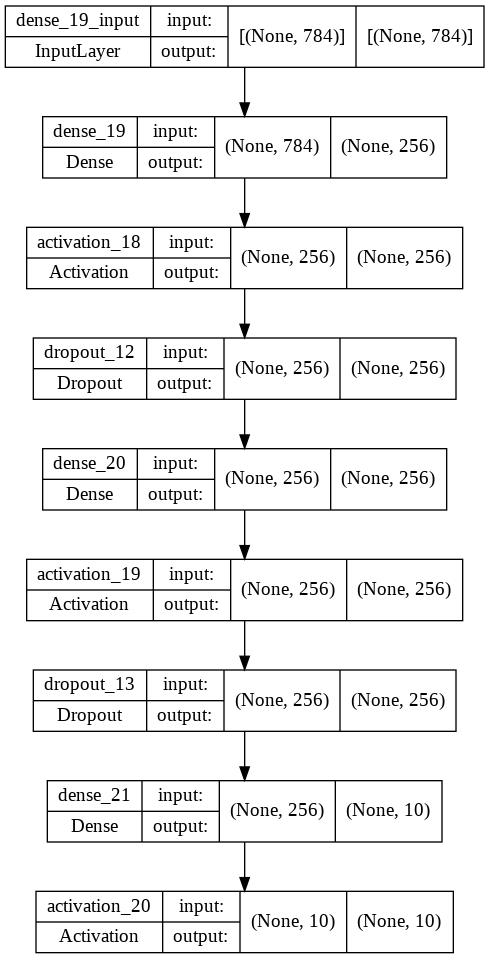

In [551]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [552]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [608]:
model.fit(x_train, y_train, epochs = 20, batch_size=batch_size)

Epoch 1/20
8/8 [==============================] - 0s 8ms/step - loss: 0.2196 - accuracy: 0.9290
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 0.2300 - accuracy: 0.9330
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 0.2354 - accuracy: 0.9360
Epoch 4/20
8/8 [==============================] - 0s 9ms/step - loss: 0.2174 - accuracy: 0.9450
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 0.2203 - accuracy: 0.9300
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 0.2202 - accuracy: 0.9260
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 0.2288 - accuracy: 0.9300
Epoch 8/20
8/8 [==============================] - 0s 10ms/step - loss: 0.2180 - accuracy: 0.9280
Epoch 9/20
8/8 [==============================] - 0s 10ms/step - loss: 0.2181 - accuracy: 0.9270
Epoch 10/20
8/8 [==============================] - 0s 10ms/step - loss: 0.2097 - accuracy: 0.9350
Epoch 11/20
8/8 [===================

In [609]:
y_predicted = model.predict(x_test)

In [610]:
y_predicted[0]

array([0.00072843, 0.00000064, 0.00000075, 0.00005636, 0.00056322,
       0.9973054 , 0.00012977, 0.00000088, 0.00047798, 0.00073671],
      dtype=float32)

In [611]:
y_predicted[0]
y_predicted[0].argmax()

5

8,  4,  5,  7,  2,  9,  2,  1, 10,  9,  1,  4,  2,  3,  8,  1,  3,
       10,  7,  1,  2,  7,  8,  2, 10,  8,  7,  6,  6,  9,  9,  4,  5,  5,

https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras/notebook
https://www.milindsoorya.com/blog/handwritten-digits-classification


In [612]:
y_predicted_labels = [np.argmax(i) + 1 for i in y_predicted]
y_predicted_labels[:10]



[6, 2, 2, 4, 7, 3, 7, 4, 4, 2]

In [613]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [614]:
y_predicted_labels

[6,
 2,
 2,
 4,
 7,
 3,
 7,
 4,
 4,
 2,
 8,
 5,
 6,
 3,
 4,
 1,
 3,
 1,
 10,
 8,
 2,
 9,
 4,
 5,
 6,
 7,
 2,
 5,
 1,
 10,
 3,
 4,
 7,
 9,
 2,
 5,
 7,
 8,
 5,
 3,
 9,
 6,
 1,
 7,
 2,
 4,
 1,
 7,
 2,
 10,
 9,
 7,
 4,
 4,
 6,
 3,
 2,
 3,
 7,
 5,
 1,
 7,
 8,
 10,
 1,
 1,
 1,
 3,
 6,
 7,
 6,
 6,
 5,
 2,
 8,
 4,
 4,
 4,
 5,
 10,
 4,
 8,
 2,
 3,
 7,
 6,
 8,
 8,
 7,
 10,
 4,
 9,
 5,
 3,
 3,
 2,
 9,
 4,
 8,
 2,
 5,
 4,
 9,
 1,
 9,
 2,
 5,
 3,
 1,
 4,
 6,
 5,
 10,
 8,
 4,
 9,
 9,
 10,
 6,
 1,
 1,
 2,
 8,
 3,
 10,
 4,
 6,
 8,
 5,
 9,
 1,
 10,
 3,
 1,
 10,
 2,
 6,
 3,
 2,
 4,
 6,
 2,
 1,
 6,
 6,
 7,
 10,
 8,
 2,
 9,
 1,
 10,
 2,
 3,
 2,
 6,
 1,
 2,
 9,
 7,
 1,
 5,
 10,
 4,
 7,
 10,
 7,
 10,
 8,
 1,
 10,
 10,
 8,
 8,
 4,
 2,
 4,
 7,
 6,
 5,
 5,
 4,
 2,
 7,
 5,
 3,
 4,
 3,
 7,
 1,
 7,
 1,
 8,
 6,
 10,
 10,
 7,
 6,
 1,
 8,
 8,
 4,
 8,
 3,
 8,
 3,
 6,
 5,
 1,
 8,
 4,
 7,
 10,
 8,
 5,
 8,
 4,
 3,
 5,
 9,
 7,
 9,
 10,
 3,
 2,
 9,
 4,
 4,
 3,
 8,
 8,
 2,
 6,
 4,
 7,
 10,
 9,
 1,
 6,
 10,
 2,
 2,
 1,
 8,


In [615]:
df = pd.DataFrame(y_predicted_labels)

In [616]:
df

,0
0,6
1,2
2,2
3,4
4,7
...,...
4995,10
4996,9
4997,2
4998,5


In [617]:
df.index+=1

In [618]:
df

,0
1,6
2,2
3,2
4,4
5,7
...,...
4996,10
4997,9
4998,2
4999,5


In [619]:
df.to_csv("Sarpe_Daiana.csv")

In [620]:
from google.colab import files

files.download('Sarpe_Daiana.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [565]:
df

,0
1,5
2,1
3,1
4,3
5,6
...,...
4996,9
4997,3
4998,1
4999,4


In [566]:
df = df.reset_index(drop=True)

In [567]:
df

,0
0,5
1,1
2,1
3,3
4,6
...,...
4995,9
4996,3
4997,1
4998,4
